### 서로소 집합

In [10]:
array=[(1,4),(2,3),(2,4),(5,6)]

maxNum=0

for i in array:
    for j in i:
        if j>maxNum:
            maxNum=j
print(maxNum)
dp=[x for x in range(maxNum+1)]
print(dp)

for node in array:
    print(dp[node[0]],dp[node[1]])
    if dp[node[0]]<dp[node[1]]:
        dp[node[1]]=dp[node[0]]
    elif dp[node[0]]>dp[node[1]]:
        dp[node[0]]=dp[node[1]]
    print(dp)
    print('----------------')
print(dp)


6
[0, 1, 2, 3, 4, 5, 6]
1 4
[0, 1, 2, 3, 1, 5, 6]
----------------
2 3
[0, 1, 2, 2, 1, 5, 6]
----------------
2 1
[0, 1, 1, 2, 1, 5, 6]
----------------
5 6
[0, 1, 1, 2, 1, 5, 5]
----------------
[0, 1, 1, 2, 1, 5, 5]


In [11]:
def find_parent(parent,x):
    if parent[x]!=x:
        return find_parent(parent, parent[x])
    return x

In [12]:
def union_parent(parent, a, b):
    a=find_parent(parent,a)
    b=find_parent(parent,b)
    
    if a<b:
        parent[b]=a
    else:
        parent[a]=b

In [14]:
#array=[(1,4),(2,3),(2,4),(5,6)]
array=[(4,5),(3,4),(2,3),(1,2)]
maxNum=0

for i in array:
    for j in i:
        if j>maxNum:
            maxNum=j
print(maxNum)
parent=[x for x in range(maxNum+1)]
print(parent)

for a,b in array:
    union_parent(parent,a,b)

for i in range(1,maxNum+1):
    print(find_parent(parent,i), end=' ')

print()
print(parent)

5
[0, 1, 2, 3, 4, 5]
1 1 1 1 1 
[0, 1, 1, 2, 3, 4]


### 서로소 집합을 활용한 사이클 판별

In [15]:
def find_parent(parent,x):
    if parent[x]!=x:
        parent[x]=find_parent(parent, parent[x])
    return parent[x]

In [16]:
def union_parent(parent, a, b):
    a=find_parent(parent,a)
    b=find_parent(parent,b)
    
    if a<b:
        parent[b]=a
    else:
        parent[a]=b

In [21]:
#array=[(1,4),(2,3),(2,4),(5,6)]
#array=[(4,5),(3,4),(2,3),(1,2)]
array=[(1,2),(1,3),(2,3)]

maxNum=0

for i in array:
    for j in i:
        if j>maxNum:
            maxNum=j
parent=[x for x in range(maxNum+1)]

cycle=False

for a,b in array:
    #사이클이 발생한 경우 종료
    newa=find_parent(parent,a)
    newb=find_parent(parent,b)
    print(newa)
    print(newb)
    if newa==newb:
        cycle=True
        break
    #사이클이 발생하지 않았다면 합집합 연산 수행
    else:
        union_parent(parent,a,b)
    print(parent)
    print('---------------')

if cycle:
    print("사이클 발생")
else:
    print("사이클 미발생")

1
2
[0, 1, 1, 3]
---------------
1
3
[0, 1, 1, 1]
---------------
1
1
사이클 발생


### 신장 트리

In [1]:
from IPython.display import Image
path = f'./08그래프/'

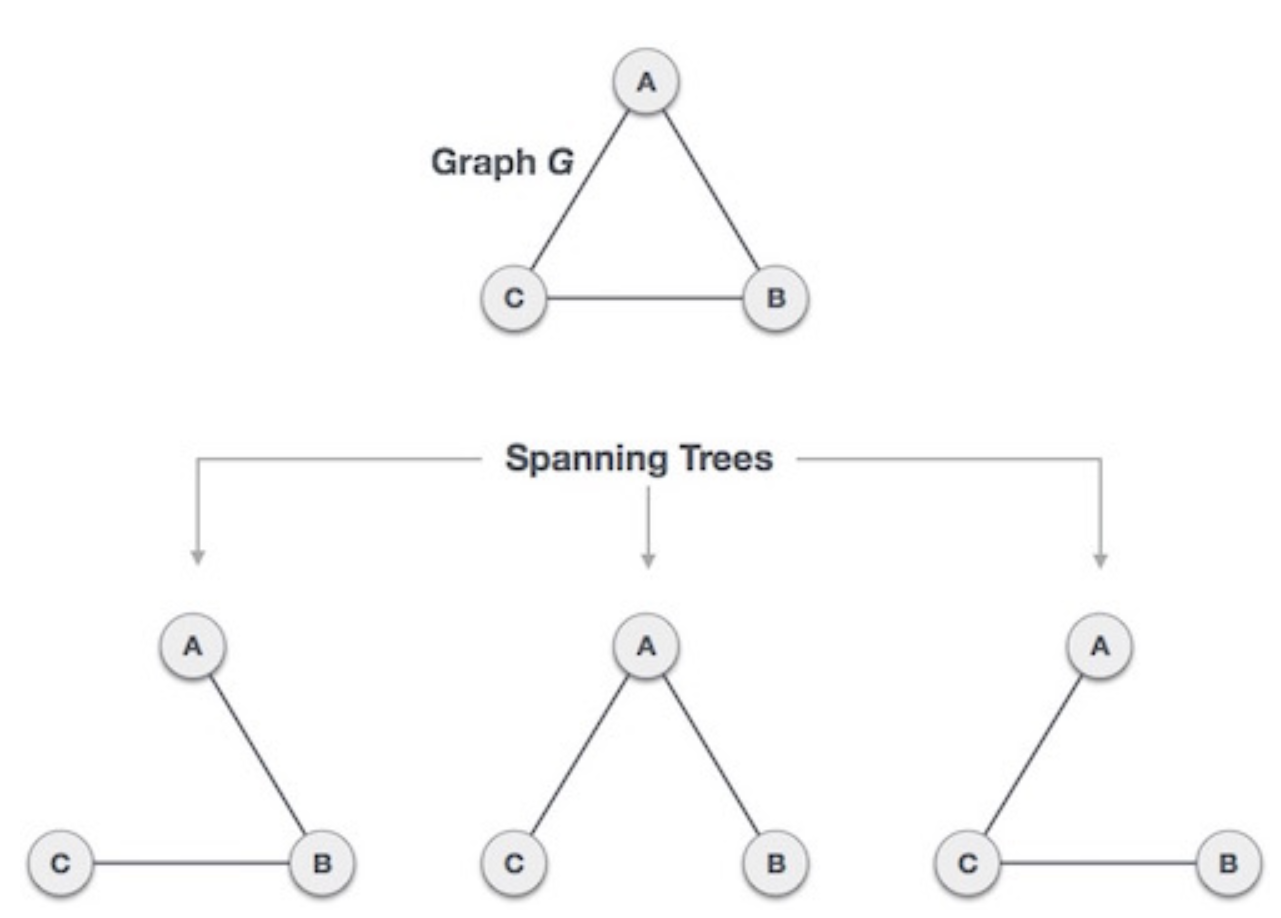

In [26]:
Image(path+"01.png",width = 600)

## 1. 크루스칼 알고리즘

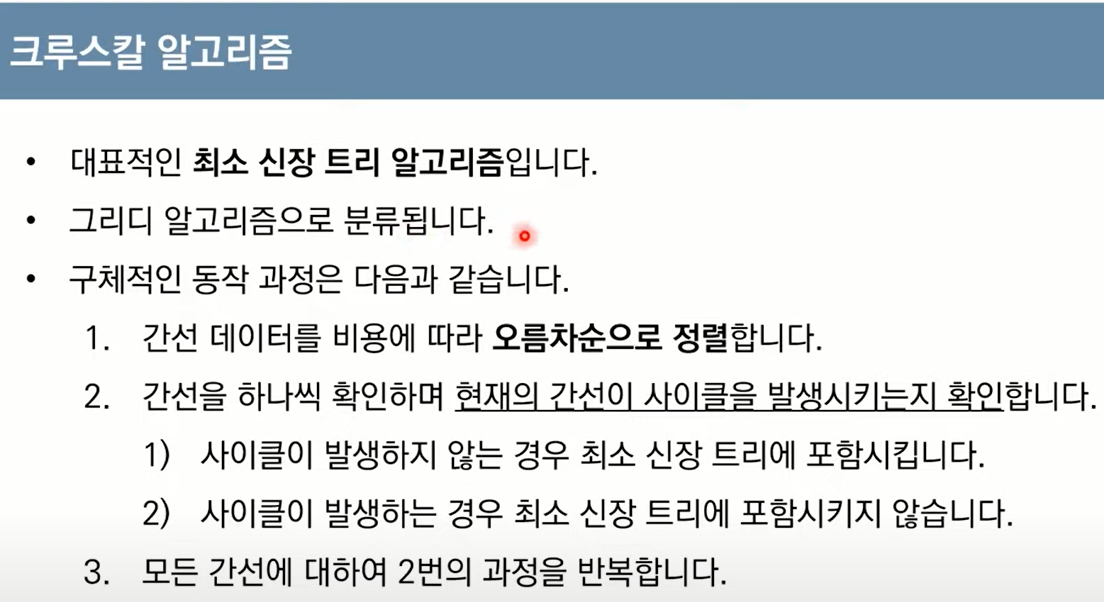

In [25]:
Image(path+"02.png",width = 600)

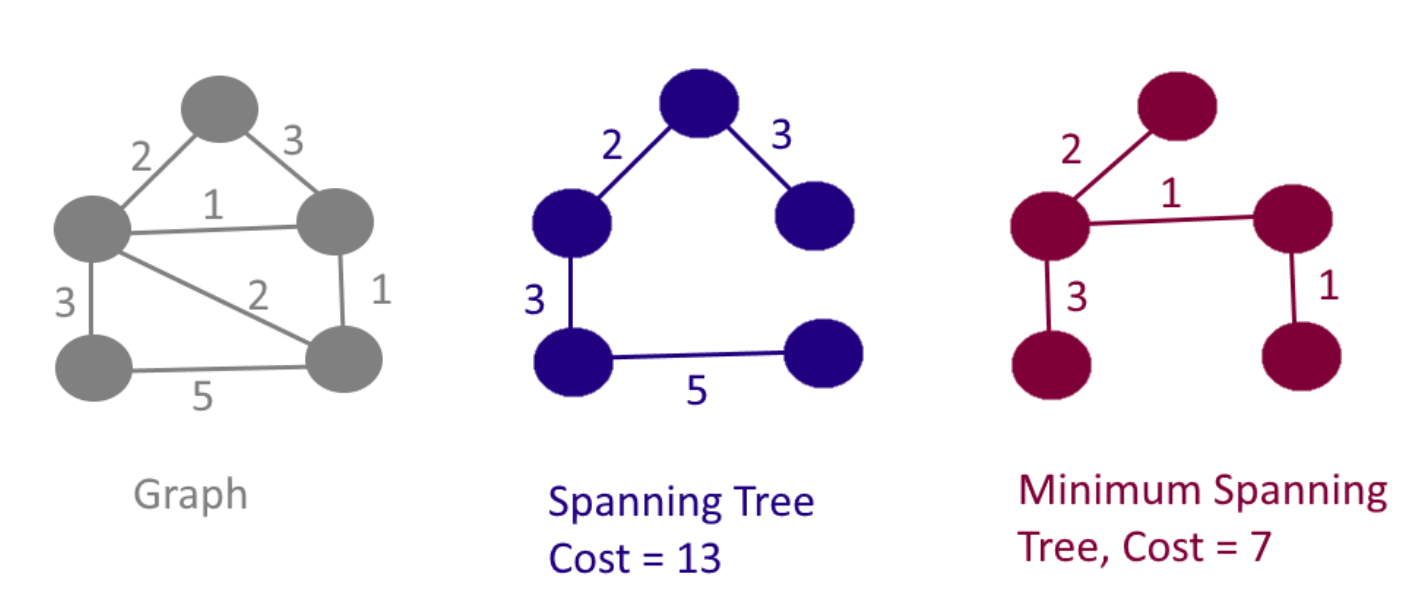

In [27]:
Image(path+"03.png",width = 600)

In [36]:
n,m=7,9
graph=[(3,4,7),(4,7,13),(4,6,23),(6,7,25),(1,2,29),(2,6,34),(2,3,35),(5,6,53),(1,5,75)]
parent=[x for x in range(n+1)]
edges=[] #cost, a, b
for node in graph:
    edges.append((node[2],node[0],node[1]))
#print(edges)

import heapq

#1. 간선에 대해 비용순으로 정렬하기
sortedEdges=[]
for node in edges:
    heapq.heappush(sortedEdges,node)
print(sortedEdges)

#2. 부모 노드가 다른 것에 대해 union 진행하고 전체 경로 합 계산
totalCost=0
for i in range(m):
    cost,a,b=sortedEdges[i]
    if find_parent(parent,a)!=find_parent(parent,b):
        union_parent(parent, a, b)
        totalCost+=cost
print(totalCost)

[(7, 3, 4), (13, 4, 7), (23, 4, 6), (25, 6, 7), (29, 1, 2), (34, 2, 6), (35, 2, 3), (53, 5, 6), (75, 1, 5)]
159


### 노드 정렬할 때 표준 정렬알고리즘을 썼을 경우

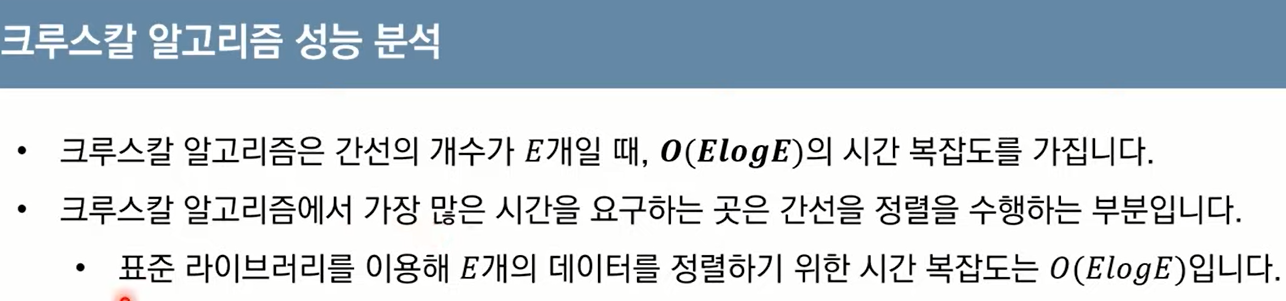

In [37]:
Image(path+"04.png",width = 600)

## 2. 위상정렬

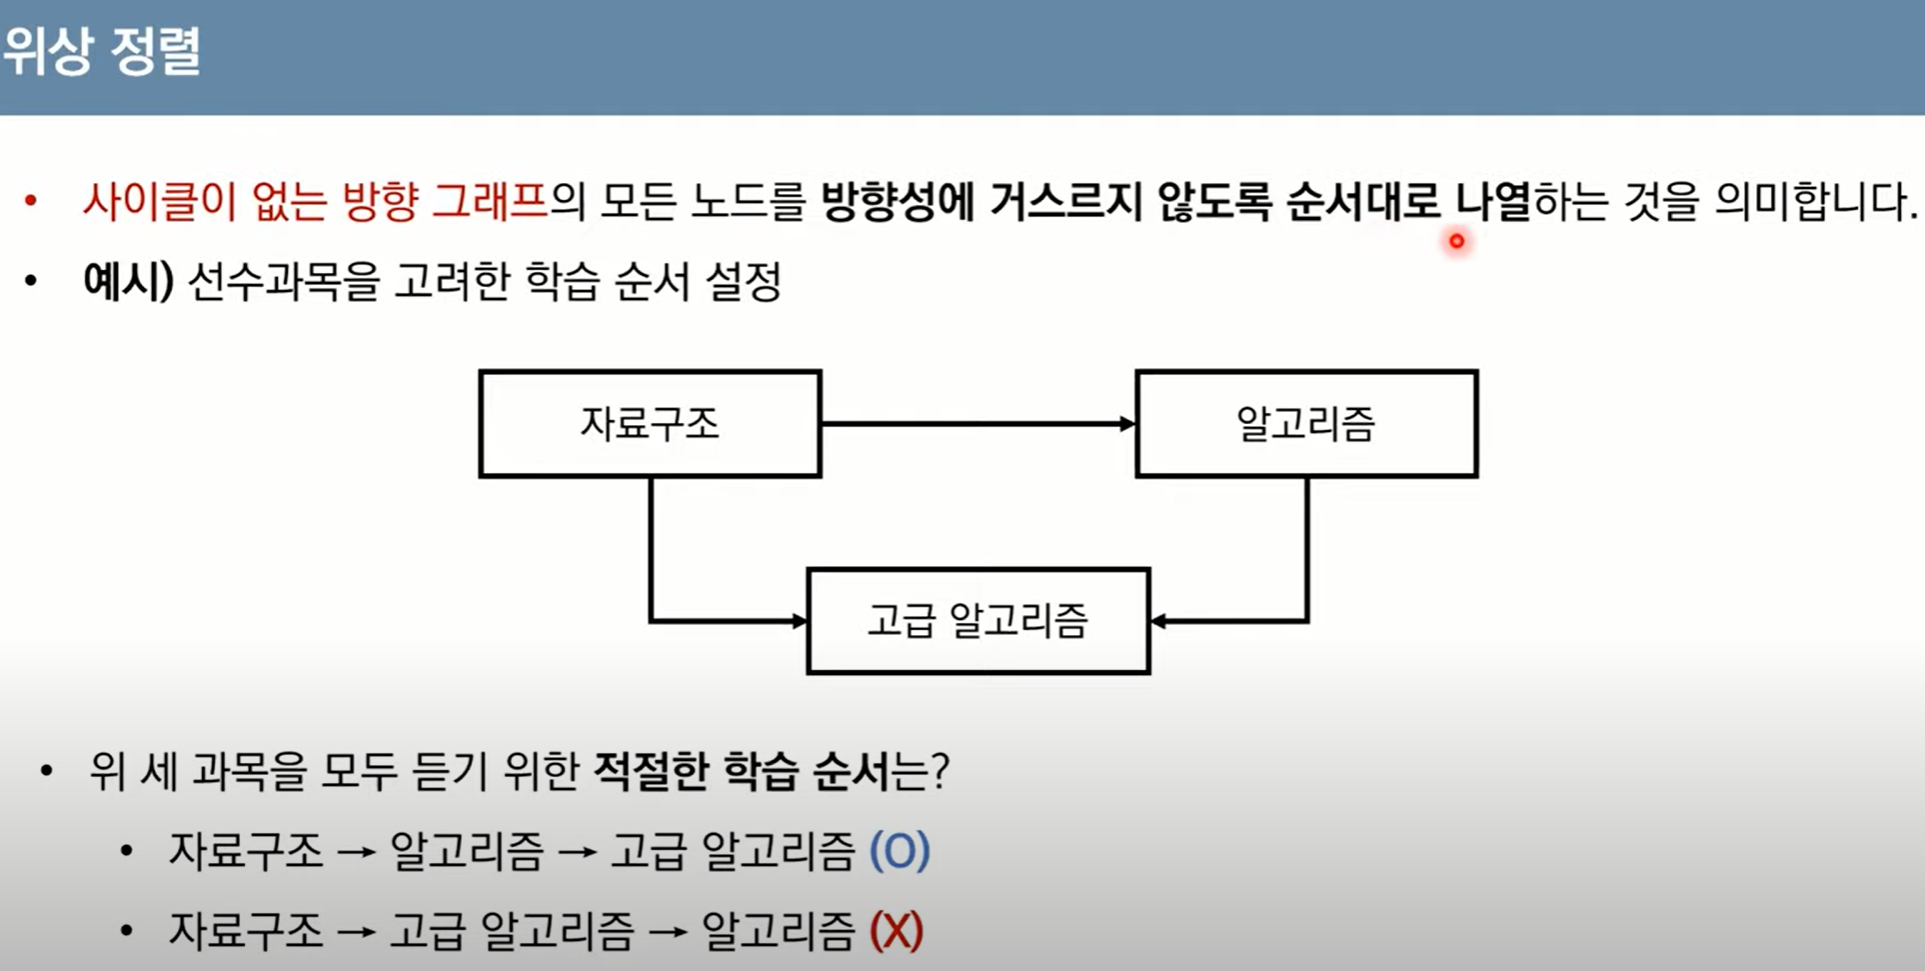

In [2]:
Image(path+"05.png",width = 600)

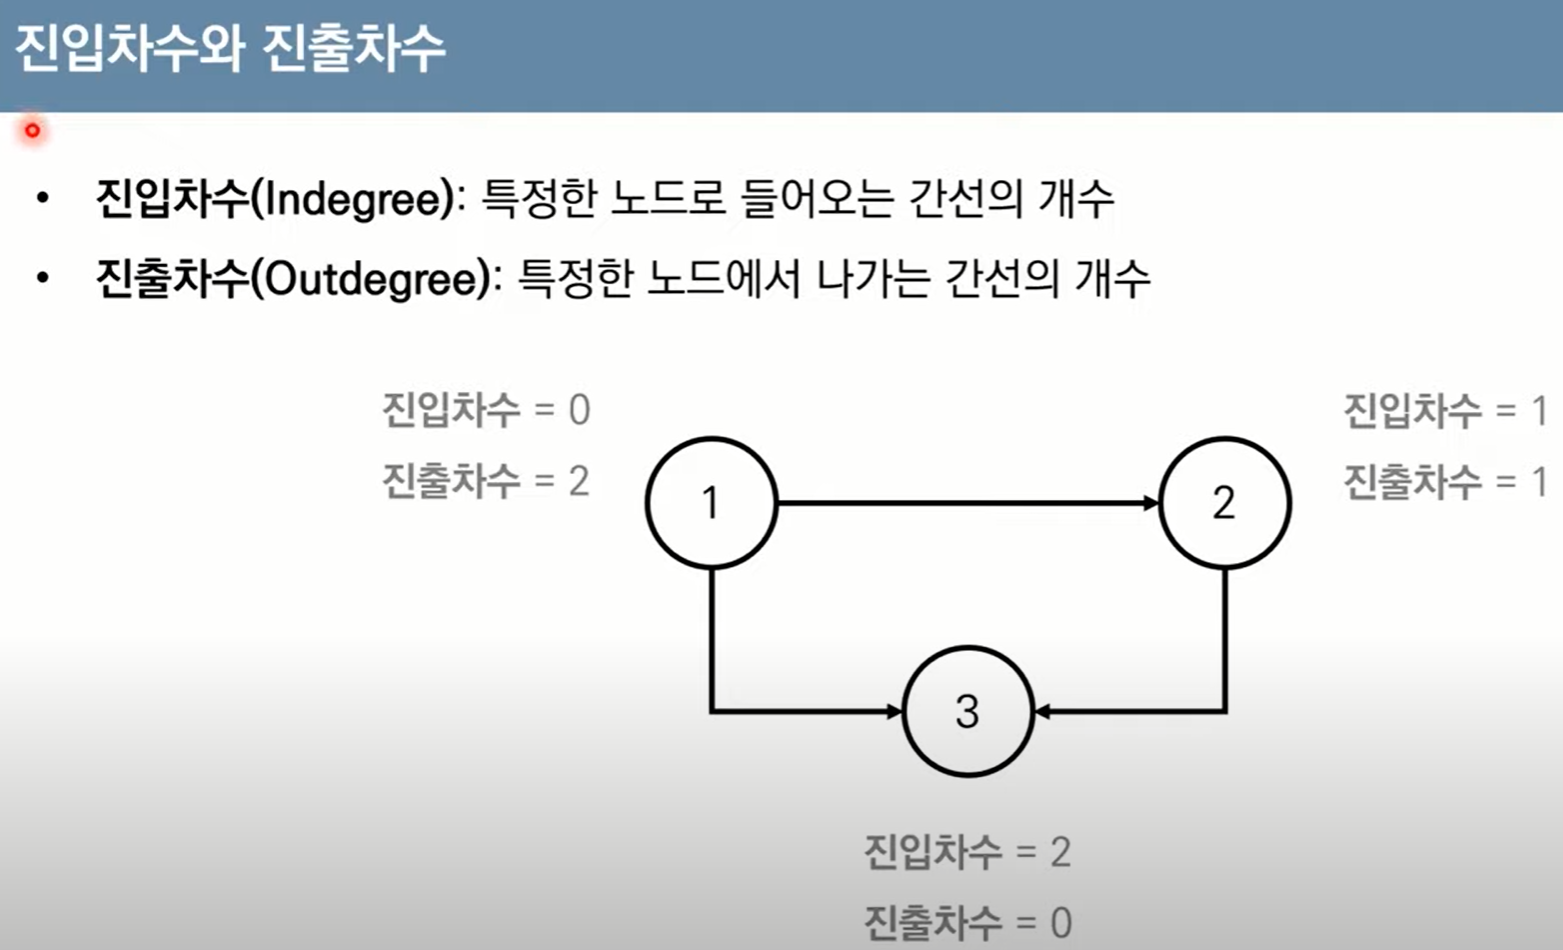

In [3]:
Image(path+"06.png",width = 600)

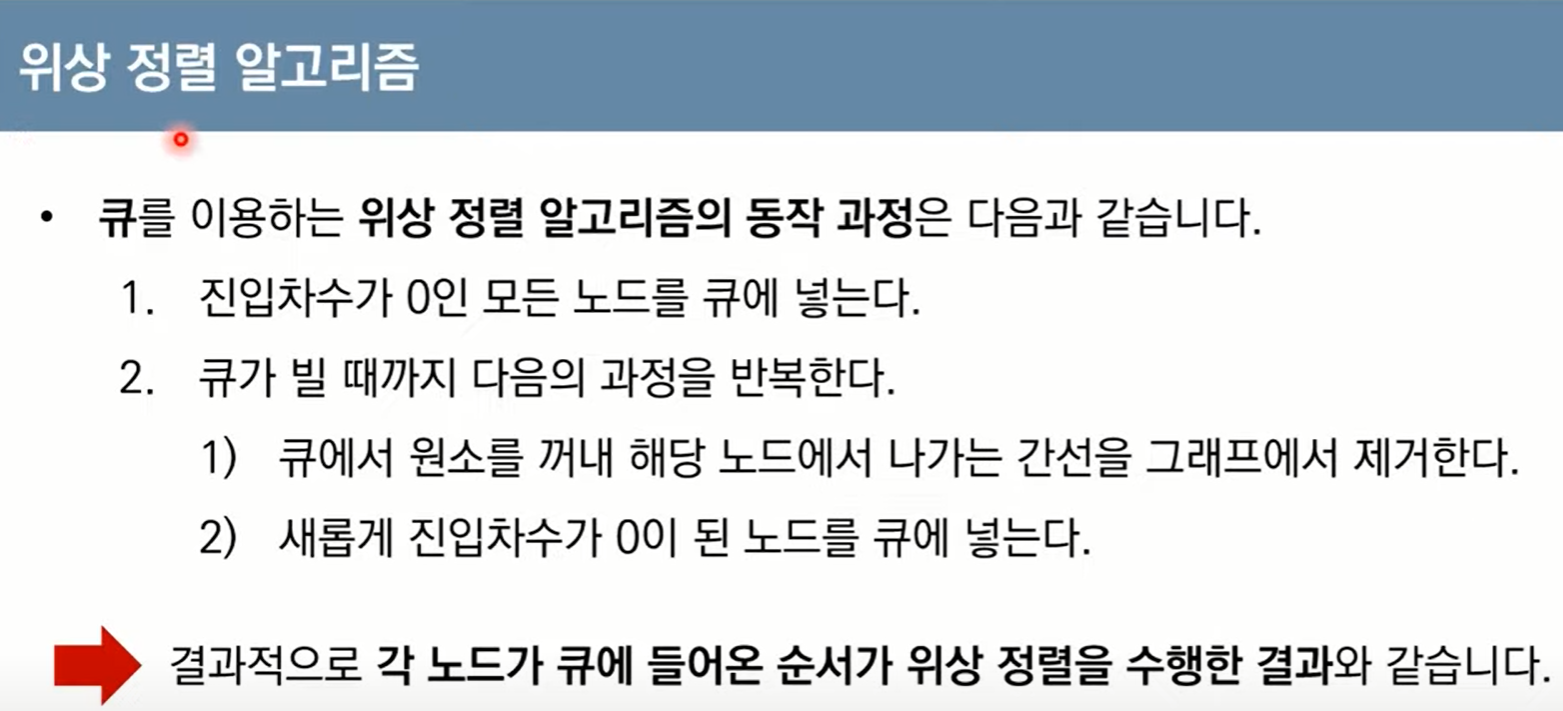

In [4]:
Image(path+"07.png",width = 600)

In [33]:
n,m=7,8
graph=[
    [],
    [2,5],
    [3,6],
    [4],
    [7],
    [6],
    [4],
    []
]
visited=[False]*(n+1)

from collections import deque
q=deque()
def countIn(graph,n):
    InArray=[0]*(n+1)
    for idx in range(1,n+1):
        for node in graph[idx]:
            InArray[node]+=1
    return InArray
def appendQ(array,n,visit):
    print(array)
    for i in range(1,n+1):
        if array[i]==0 and visit[i]==False and i not in q:
            q.append(i)

appendQ(countIn(graph,n),n,visited)
answer=[]
while q:
    print(q)
    node=q.popleft()
    answer.append(node)
    visited[node]=True
    graph[node]=[]
    #print(graph)
    appendQ(countIn(graph,n),n,visited)
    pass

print('-------------------')
print(visited)
print(answer)

[0, 0, 1, 1, 2, 1, 2, 1]
deque([1])
[0, 0, 0, 1, 2, 0, 2, 1]
deque([2, 5])
[0, 0, 0, 0, 2, 0, 1, 1]
deque([5, 3])
[0, 0, 0, 0, 2, 0, 0, 1]
deque([3, 6])
[0, 0, 0, 0, 1, 0, 0, 1]
deque([6])
[0, 0, 0, 0, 0, 0, 0, 1]
deque([4])
[0, 0, 0, 0, 0, 0, 0, 0]
deque([7])
[0, 0, 0, 0, 0, 0, 0, 0]
-------------------
[False, True, True, True, True, True, True, True]
[1, 2, 5, 3, 6, 4, 7]


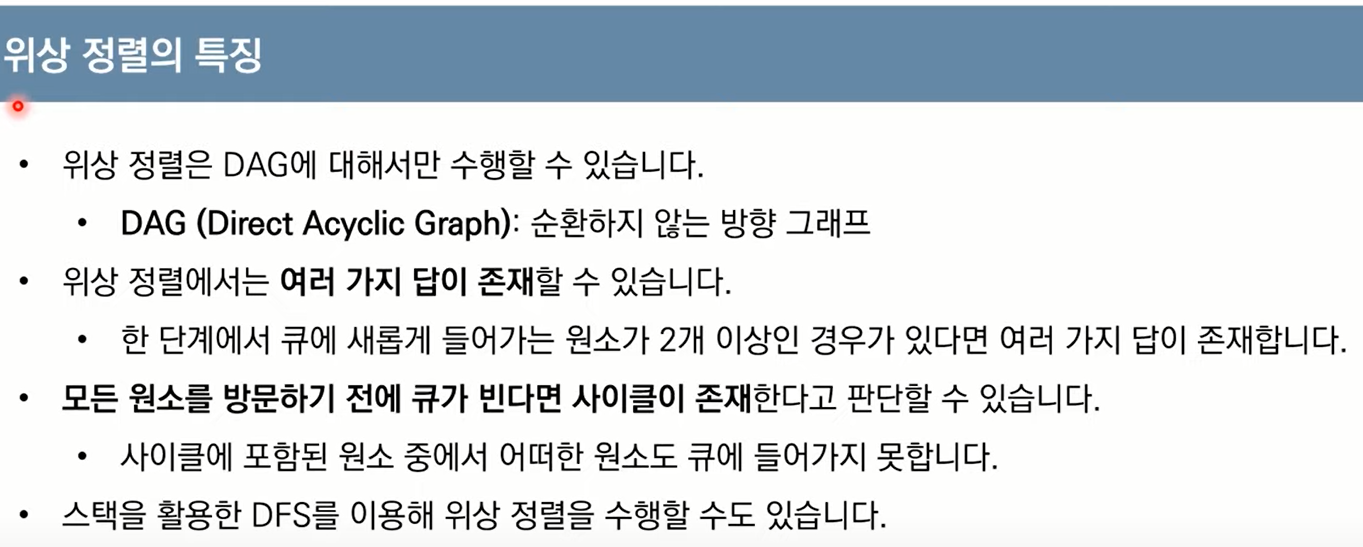

In [31]:
Image(path+"08.png",width = 600)

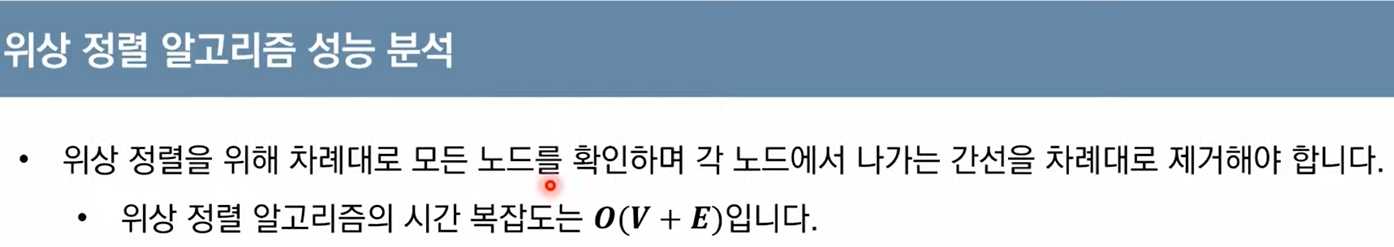

In [34]:
Image(path+"09.png",width = 600)